<h1 align="center" style="color: #03b1fc; font-size: 100px; font-weight: bold;">
  Flight Price Prediction
</h1>


In [6]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme() #customizing global plot aesthetics and defaults.


<h1 align="center" style="color:rgb(247, 187, 9); font-size: 50px; font-weight: bold;">
  Importing the Dataset 
</h1>

1. ### **Dataset Source**  
   - We obtained the flight fare prediction dataset from <span style="color:#119992; font-size:20px;font-weight: bold">Kaggle</span> .It contains flight fare information from  <span style="color:#119992; font-size:20px;font-weight: bold">major airports in India </span>, and we aim to enhance it further in future iterations.

2. ### **Loading the Data**  
   - Since the data is in Excel format, we use `pandas.read_excel()` to load it into a DataFrame.

3. ### **Checking Data Information**  
   - After loading, it’s crucial to inspect the DataFrame (e.g., using `df.info()`) to identify any hidden details like null values or improper data types.

4. ### **Handling Missing Values**  
   - Check if there are any null values. If present, possible approaches include:
     - **Imputation** (e.g., using scikit-learn’s Imputer classes)  
     - **Filling NaN values** with mean, median, or mode using `df.fillna()`

5. ### **Descriptive Statistics**  
   - Use `df.describe()` to view basic statistical details of each column, such as mean, median, and standard deviation.

6. ### **Future Upgrades**  
   - We plan to refine and  <span style="color:#119992; font-size:20px;font-weight: bold">expand this dataset </span>to improve the accuracy and robustness of  <span style="color:#119992; font-size:20px;font-weight: bold">flight fare predictions over time. </span>


In [7]:
# Read the Excel file into a DataFrame named 'train_data'
train_data = pd.read_excel(r"Data_Train.xlsx")

In [8]:
# Display all columns in the DataFrame without truncation
pd.set_option('display.max_columns', None)
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


<h4 style="color:#119992; font-size:20px;font-weight: bold">General Overview</h4>

- The dataset contains flight fare information from major airports in India.
- There are <span style="color:#119992; font-size:16px;font-weight: bold">10,683 entries </span> with <span style="color:#119992; font-size:16px;font-weight: bold"> 11 columns </span>, which include both categorical and numerical data.


In [9]:
# Display a summary of the DataFrame, including column types and non-null counts
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


<h4 style="color:#119992; font-size:20px;font-weight: bold">Column Details</h4>

<ol>
    <li><span style="color:#119992;">Airline</span>: The airline operating the flight. Categorical data.</li>
    <li><span style="color:#119992;">Date_of_Journey</span>: The date of the journey. This is stored as an object (string) and may need to be converted to a <code>datetime</code> type for analysis.</li>
    <li><span style="color:#119992;">Source</span>: The departure city/airport. Categorical data.</li>
    <li><span style="color:#119992;">Destination</span>: The arrival city/airport. Categorical data.</li>
    <li><span style="color:#119992;">Route</span>: The path of the flight, including stops. Categorical data.</li>
    <li><span style="color:#119992;">Dep_Time</span>: The departure time of the flight. Currently stored as an object.</li>
    <li><span style="color:#119992;">Arrival_Time</span>: The arrival time of the flight. Currently stored as an object.</li>
    <li><span style="color:#119992;">Duration</span>: The total duration of the flight. This is an object type but provides insights into the travel time.</li>
    <li><span style="color:#119992;">Total_Stops</span>: The number of stops during the journey. Categorical data that can be numerically encoded.</li>
    <li><span style="color:#119992;">Additional_Info</span>: Miscellaneous information about the flight. This appears to have limited variation (mostly "No info").</li>
    <li><span style="color:#119992;">Price</span>: The target variable, representing the fare of the flight in INR. This is numerical (<code>int64</code>).</li>
</ol>


In [10]:
train_data["Duration"].value_counts()
# counts the each unique value in the column

Duration
2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
30h 10m      1
31h 30m      1
42h 5m       1
4h 10m       1
5m           1
Name: count, Length: 368, dtype: int64

In [11]:
#eliminate missing values
train_data.dropna(inplace = True)

In [12]:
# Check for missing values in each column of the DataFrame and display the total count of null values per column
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

---

<h1 align="center" style="color:rgb(247, 187, 9); font-size: 50px; font-weight: bold;">
  Exploratory Data Analysis 
</h1>

- **From the description, we can see that `Date_of_Journey` is an object data type.**
- **Therefore, we need to convert this data type into a timestamp to use this column properly for prediction.**


<span style="color:#119992;font-size:20px;font-weight: bold">.dt.day method will extract only day of that date</span>

In [13]:
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day

<span style="color:#119992;font-size:20px;font-weight: bold">.dt.month method will extract only month of that date</span>

In [14]:
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [15]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [16]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)



<h2 style="color:rgb(16, 136, 18); font-size: 30px; font-weight: bold;">Extracting Information from  <span style="color:#119992; font-size:30px;font-weight: bold"> Departure Time</span>

</h2>
<ul style="font-size: 20px; font-weight: bold;">
  <li>Departure time is when a plane leaves the gate.</li>
  <li>Similar to <code>Date_of_Journey</code>, we can extract values from <code>Dep_Time</code>.</li>
  <li>Extracting hours and minutes from <code>Dep_Time</code>.</li>
</ul>


In [17]:
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"], format="%H:%M").dt.hour
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"], format="%H:%M").dt.minute

# Dropping the Dep_Time column as it is no longer needed
train_data.drop(["Dep_Time"], axis=1, inplace=True)


In [18]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50




<h2 style="color:rgb(16, 136, 18); font-size: 30px; font-weight: bold;">Extracting Information from  <span style="color:#119992; font-size:30px;font-weight: bold"> Departure Time</span>

</h2>
<ul style="font-size: 20px; font-weight: bold;">
  <li>Departure time is when a plane leaves the gate.</li>
  <li>Similar to <code>Date_of_Journey</code>, we can extract values from <code>Dep_Time</code>.</li>
  <li>Extracting hours and minutes from <code>Dep_Time</code>.</li>
</ul>


In [19]:
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

# Extracting Minutes
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

C:\Users\prasa\AppData\Local\Temp\ipykernel_22812\4054205965.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour
C:\Users\prasa\AppData\Local\Temp\ipykernel_22812\4054205965.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute


In [20]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


<h2 style="color:rgb(16, 136, 18); font-size: 30px; font-weight: bold;">Extracting Information from  <span style="color:#119992; font-size:30px;font-weight: bold"> Arrival Time</span> </h2>
<ul style="font-size: 20px; font-weight: bold;">
  <li>Time taken by the plane to reach its destination is called <code>Duration</code>.</li>
  <li>It is the difference between <code>Departure Time</code> and <code>Arrival Time</code>.</li>
  <li>Assigning and converting the <code>Duration</code> column into a list.</li>
</ul>


In [21]:
# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

<span style="color:rgb(16, 136, 18); font-size: 30px; font-weight: bold;">
  Adding 
  <span style="color:#119992; font-size:30px;font-weight: bold;">duration_hours</span>
  and 
  <span style="color:#119992; font-size:30px;font-weight: bold;">duration_mins</span>
  list to train_data dataframe
</span>


In [22]:
train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [23]:
train_data.drop(["Duration"], axis = 1, inplace = True)

In [24]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


---

<h1 align="left" style="color:rgb(16, 136, 18); font-size: 30px; font-weight: bold;">
  Handling Categorical Data 
</h1>


One can find many ways to handle categorical data. Some of them categorical data are,
1. <span style="color:#119992">**Nominal data**</span> --> data are not in any order --> <span style="color: green;">**OneHotEncoder**</span> is used in this case
2. <span style="color:#119992">**Ordinal data**</span> --> data are in order --> <span style="color: green;">**LabelEncoder**</span> is used in this case

In [25]:
train_data["Airline"].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

<h1 align="left" style="color:rgb(16, 136, 18); font-size: 30px; font-weight: bold;">
  Airline vs Price Graph 
</h1>

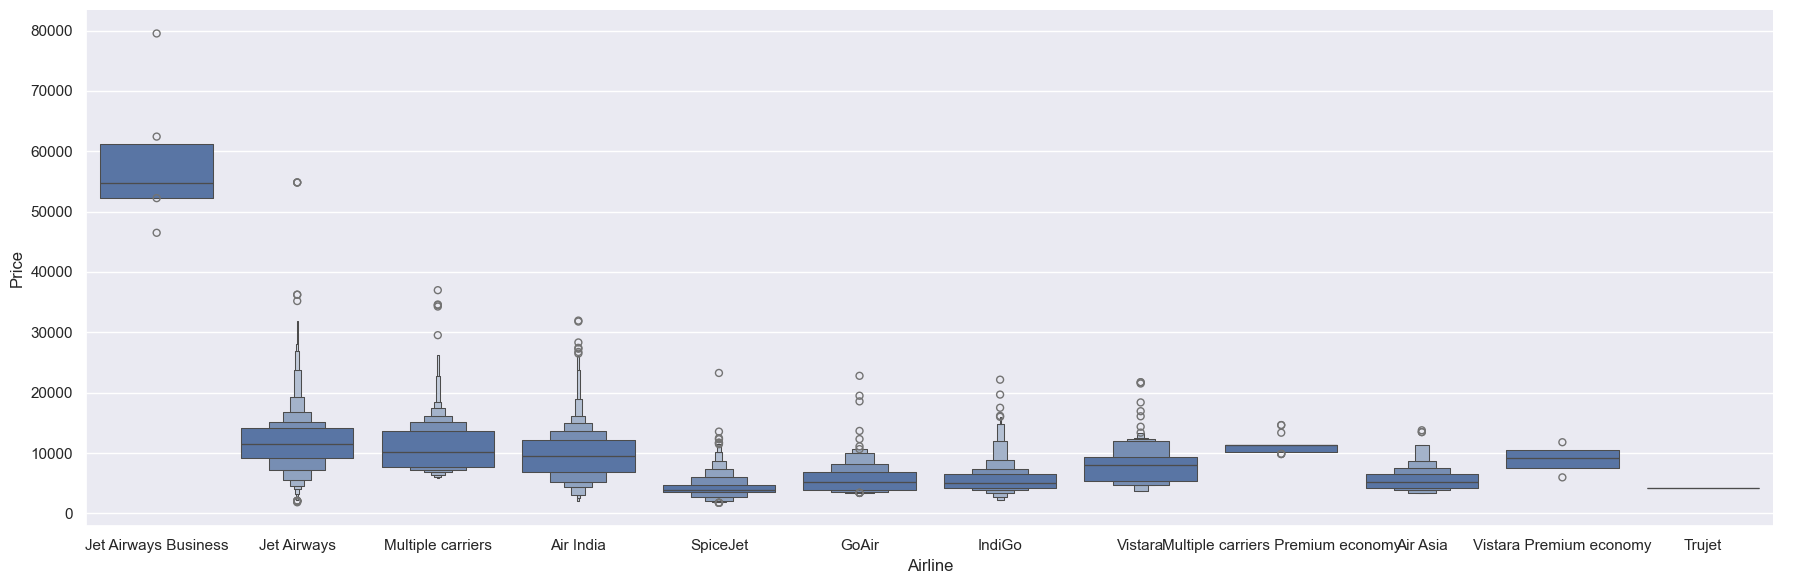

In [26]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [27]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = train_data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


In [28]:
train_data["Source"].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

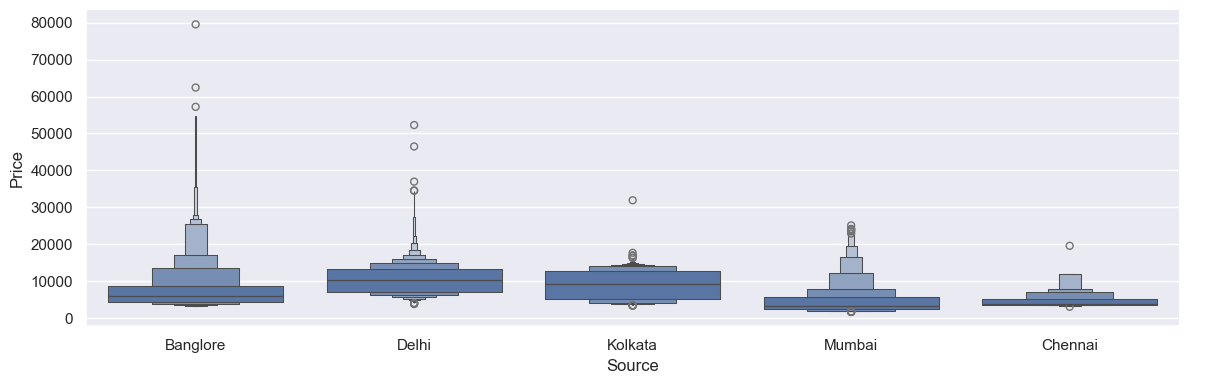

In [29]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

 <span style="color:rgb(16, 136, 18); font-size: 30px; font-weight: bold;">Handling Nominal Categorical Data: OneHotEncoding for  <span style="color:#119992; font-size:30px;font-weight: bold">Source Column </span>

 </span>


In [30]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = train_data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [31]:
train_data["Destination"].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

 <span style="color:rgb(16, 136, 18); font-size: 30px; font-weight: bold;">Handling Nominal Categorical Data: OneHotEncoding for  <span style="color:#119992; font-size:30px;font-weight: bold">Destination Column </span>

 </span>


In [32]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = train_data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


In [33]:
train_data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [34]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [35]:
train_data["Total_Stops"].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

 <span style="color:rgb(16, 136, 18); font-size: 30px; font-weight: bold;">Handling Ordinal Categorical Data: <span style="color:#119992; font-size:30px;font-weight: bold">Label Encoding </span>

  </span>


In [36]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

C:\Users\prasa\AppData\Local\Temp\ipykernel_22812\1758178131.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)


In [37]:
# Group data by Source, Destination, and Total_Stops, and calculate count and average price
stops_summary = train_data.groupby(['Source', 'Destination', 'Total_Stops']).agg(
    Count=('Price', 'size'),         # Count of flights
    Average_Price=('Price', 'mean')  # Average ticket price
).reset_index()

# Display the result
print("Summary of Flights with Count and Average Price:")
print(stops_summary)



Summary of Flights with Count and Average Price:
      Source Destination  Total_Stops  Count  Average_Price
0   Banglore       Delhi            0   1265    5143.918577
1   Banglore   New Delhi            0    287    7399.975610
2   Banglore   New Delhi            1    562   14016.540925
3   Banglore   New Delhi            2     75   13322.800000
4   Banglore   New Delhi            3      7   12761.000000
5   Banglore   New Delhi            4      1   17686.000000
6    Chennai     Kolkata            0    381    4789.892388
7      Delhi      Cochin            0    213    6315.816901
8      Delhi      Cochin            1   3185   10030.822606
9      Delhi      Cochin            2   1113   12752.039533
10     Delhi      Cochin            3     25   12939.840000
11   Kolkata    Banglore            0    724    4556.055249
12   Kolkata    Banglore            1   1834   10477.414395
13   Kolkata    Banglore            2    302   12036.125828
14   Kolkata    Banglore            3     11   1315

In [38]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [39]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [40]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [41]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2,7662,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,13882,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,6218,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,1,13302,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [42]:
data_train.shape

(10682, 30)

---


<h1 align="center" style="color:rgb(247, 187, 9); font-size: 50px; font-weight: bold;">
    Feature Selection 
</h1>

Finding out the best feature which will contribute and have good relation with target variable.
Following are some of the feature selection methods,


1. <span style="color:#119992; font-size:20px;font-weight: bold">**heatmap**</span>
2. <span style="color:#119992; font-size:20px;font-weight: bold">**feature_importance_**</span>
3. <span style="color:#119992; font-size:20px;font-weight: bold;">**SelectKBest**</span>

In [43]:
data_train.shape

(10682, 30)

In [44]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')


 <span style="color:rgb(16, 136, 18); font-size: 30px; font-weight: bold;">Setting Target Variable: <span style="color:#119992; font-size:30px;font-weight: bold"> Price as Y-Axis </span>

  </span>


In [45]:
X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,1,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [46]:
y = data_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

<span style="color:rgb(16, 136, 18); font-size: 30px; font-weight: bold;">
  Finds 
  <span style="color:#119992; font-size:30px; font-weight: bold;">correlation</span>
  between Independent and Dependent attributes
</span>


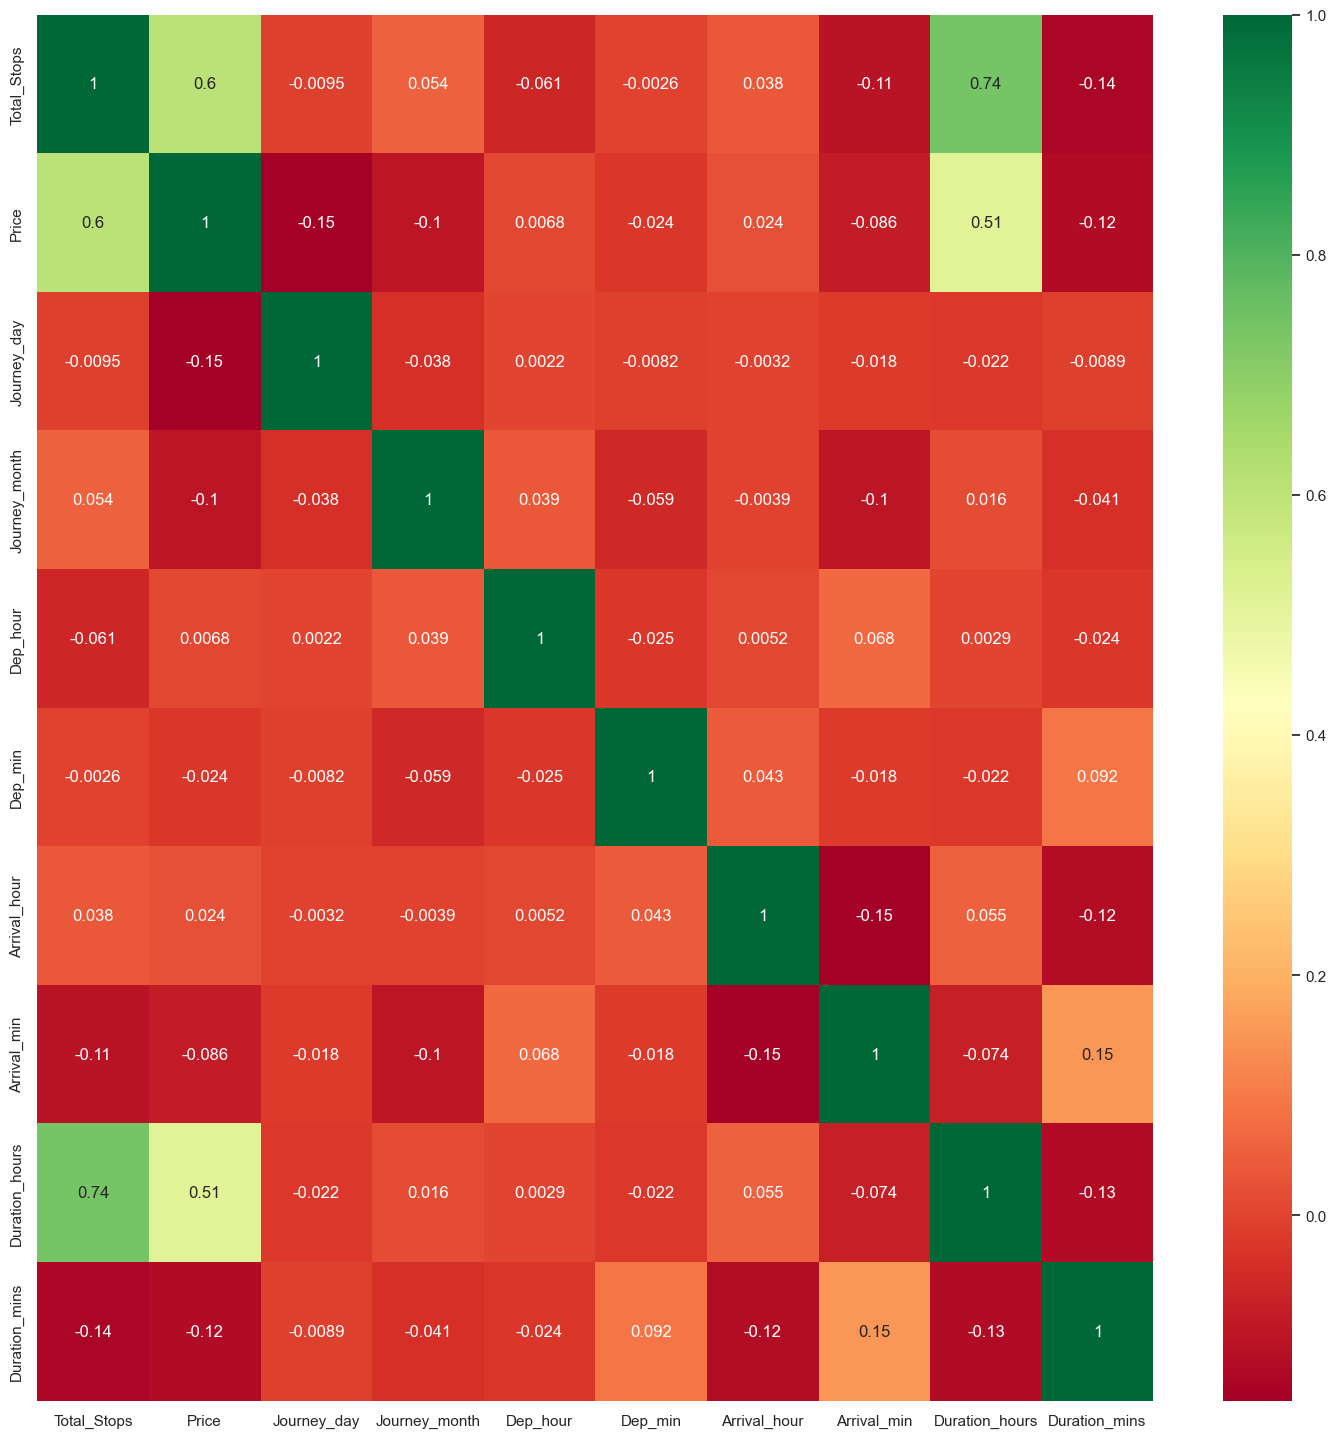

In [47]:
# Ensure all columns are numeric
numeric_data = train_data.select_dtypes(include=[np.number])

# Create the heatmap
plt.figure(figsize=(18,18))
sns.heatmap(numeric_data.corr(), annot=True, cmap="RdYlGn")
plt.show()


<span style="color:rgb(16, 136, 18); font-size: 30px; font-weight: bold;">
  Flight Price
  <span style="color:#119992; font-size:30px; font-weight: bold;">VS</span>
  Number of Stops
</span>


ok


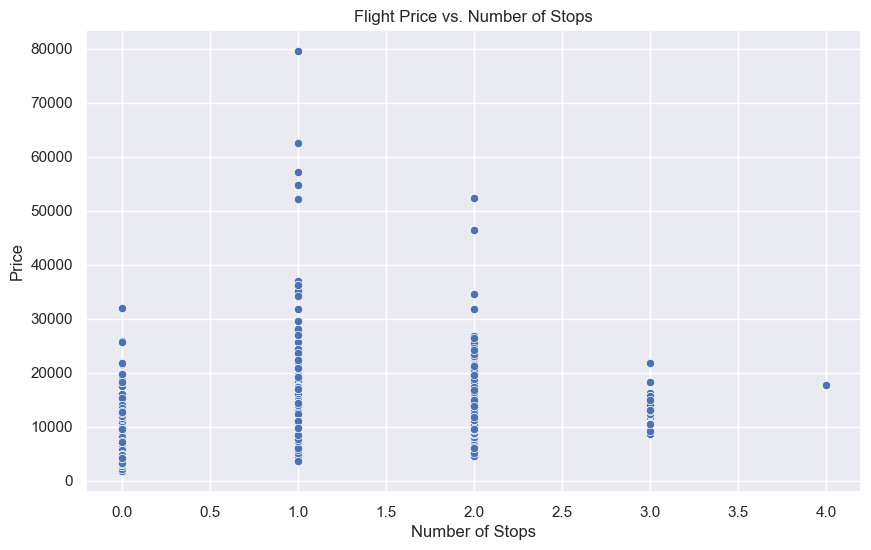

In [48]:
# Convert Total_Stops to numerical values
print('ok')
data = pd.read_excel('Data_Train.xlsx')  # Make sure you have the correct path to your data file

# Data Preprocessing
data.dropna(inplace=True)
data["Total_Stops"] = data["Total_Stops"].map({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4})

# Extract relevant columns for plotting
plot_data = data[["Total_Stops", "Price"]]
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Stops', y='Price', data=plot_data)
plt.title('Flight Price vs. Number of Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Price')
plt.grid(True)
plt.show()


<span style="color:rgb(16, 136, 18); font-size: 30px; font-weight: bold;">
  ExtraTreesRegressor for <span style="color:rgb(213, 114, 7); font-size: 30px; font-weight: bold;">feature importance 
</span>analysis.</span>
<ul style="font-size: 20px; font-weight: bold; color: #119992;">
  <li>Instantiates selection as an ExtraTreesRegressor model.</li>
  <li>Fits model on features (<code>X</code>) and target (<code>y</code>).</li>
  <li>Determines each feature’s relative importance.</li>
</ul>


In [51]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [52]:
print(selection.feature_importances_)

[2.36292097e-01 1.44119514e-01 5.30715716e-02 2.52659356e-02
 2.11302918e-02 2.80734223e-02 1.91039494e-02 1.20489073e-01
 1.71103908e-02 9.15441623e-03 1.76536649e-03 1.70221991e-02
 1.37586957e-01 6.71655161e-02 2.02778102e-02 8.33750362e-04
 2.88671369e-03 9.95989803e-05 5.12272130e-03 9.11048380e-05
 4.74412832e-04 9.99095710e-03 3.14488499e-03 6.73242836e-03
 9.62928151e-03 1.20479772e-02 5.96140787e-03 5.67309207e-04
 2.47889414e-02]


<span style="color:rgb(16, 136, 18); font-size: 30px; font-weight: bold;">
  Feature importances visualization
  
</span>


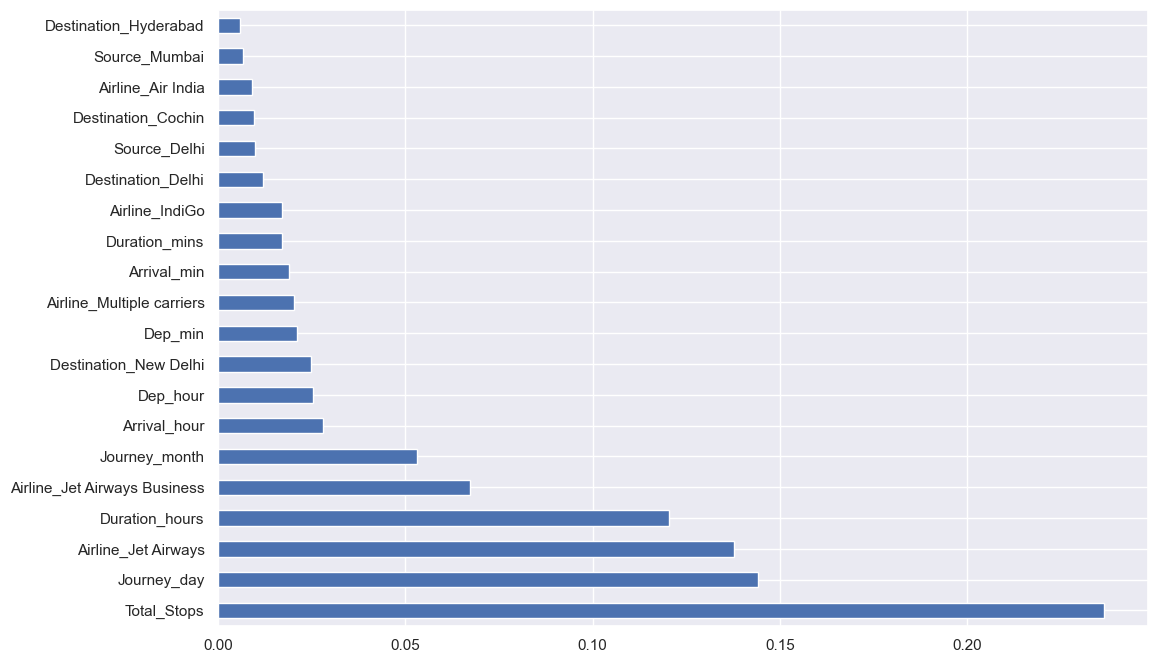

In [53]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


---

<h1 align="center" style="color:rgb(247, 187, 9); font-size: 50px; font-weight: bold;">
  Implimentation of  <span style="color:#119992; font-size:50px;font-weight: bold"> Baseline Model</span></h1>

In [54]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
baseline_model = LinearRegression()

# Train the model on the training set
baseline_model.fit(X_train, y_train)

# Predict on the test set
y_pred_baseline = baseline_model.predict(X_test)

# Evaluate the model
mae_baseline = mean_absolute_error(y_test, y_pred_baseline)
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
rmse_baseline = np.sqrt(mse_baseline)
r2_baseline = r2_score(y_test, y_pred_baseline)

# Print the evaluation metrics
print("Baseline Model (Linear Regression):")
print(f"Mean Absolute Error (MAE): {mae_baseline:.2f}")
print(f"Mean Squared Error (MSE): {mse_baseline:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_baseline:.2f}")
print(f"R² Score: {r2_baseline:.2f}")


Baseline Model (Linear Regression):
Mean Absolute Error (MAE): 1972.94
Mean Squared Error (MSE): 8202327.56
Root Mean Squared Error (RMSE): 2863.97
R² Score: 0.62


<h1 align="center" style="color:rgb(247, 187, 9); font-size: 50px; font-weight: bold;">
  Implimentation of  <span style="color:#119992; font-size:50px;font-weight: bold"> Decision Tree</span></h1>

In [55]:
# Import Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42, max_depth=10)

# Train the model on the training set
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Print evaluation metrics
print("Decision Tree Regressor:")
print(f"Mean Absolute Error (MAE): {mae_dt:.2f}")
print(f"Mean Squared Error (MSE): {mse_dt:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt:.2f}")
print(f"R² Score: {r2_dt:.2f}")


Decision Tree Regressor:
Mean Absolute Error (MAE): 1354.37
Mean Squared Error (MSE): 4795741.35
Root Mean Squared Error (RMSE): 2189.92
R² Score: 0.78


<span style="color:rgb(16, 136, 18); font-size: 30px; font-weight: bold;">
  Residual Distribution <span style="color:rgb(213, 114, 7); font-size: 30px; font-weight: bold;"> And 
</span>Scatter Plot</span>

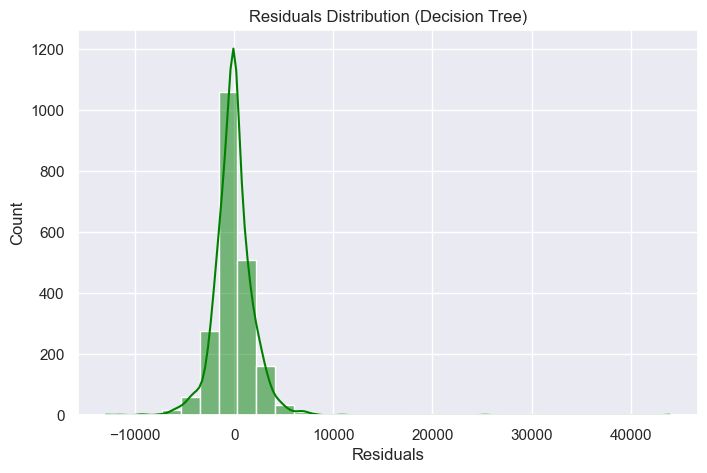

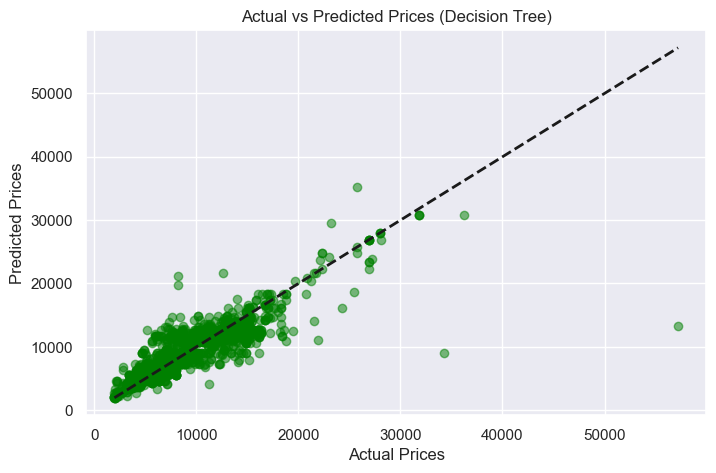

In [56]:
# Residual Plot
plt.figure(figsize=(8, 5))
sns.histplot(y_test - y_pred_dt, kde=True, bins=30, color="green")
plt.title("Residuals Distribution (Decision Tree)")
plt.xlabel("Residuals")
plt.show()

# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_dt, alpha=0.5, color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title("Actual vs Predicted Prices (Decision Tree)")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()


<h1 align="center" style="color:rgb(247, 187, 9); font-size: 50px; font-weight: bold;">
  Implimentation of  <span style="color:#119992; font-size:50px;font-weight: bold"> XG Boost</span></h1>


In [57]:
# Import XGBoost
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=10)

# Train the model on the training set
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print evaluation metrics
print("Gradient Boosting (XGBoost):")
print(f"Mean Absolute Error (MAE): {mae_xgb:.2f}")
print(f"Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.2f}")
print(f"R² Score: {r2_xgb:.2f}")


Gradient Boosting (XGBoost):
Mean Absolute Error (MAE): 1148.19
Mean Squared Error (MSE): 3706549.25
Root Mean Squared Error (RMSE): 1925.24
R² Score: 0.83


<span style="color:rgb(16, 136, 18); font-size: 30px; font-weight: bold;">
  Residual Distribution <span style="color:rgb(213, 114, 7); font-size: 30px; font-weight: bold;"> And 
</span>Scatter Plot</span>

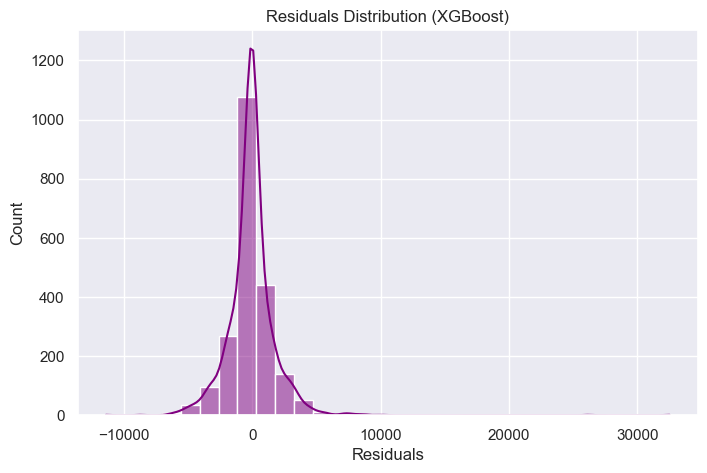

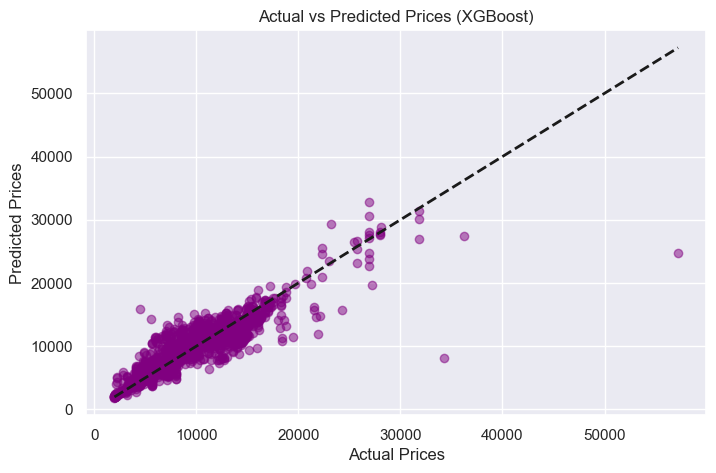

In [58]:
# Residual Plot
plt.figure(figsize=(8, 5))
sns.histplot(y_test - y_pred_xgb, kde=True, bins=30, color="purple")
plt.title("Residuals Distribution (XGBoost)")
plt.xlabel("Residuals")
plt.show()

# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color="purple")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title("Actual vs Predicted Prices (XGBoost)")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()


<h1 align="center" style="color:rgb(247, 187, 9); font-size: 50px; font-weight: bold;">
  Implimentation of  <span style="color:#119992; font-size:50px;font-weight: bold"> Random Forest Regressor</span></h1>


In [59]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=15)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest Regressor
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print evaluation metrics
print("Random Forest Regressor:")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}")



Random Forest Regressor:
Mean Absolute Error (MAE): 1146.04
Mean Squared Error (MSE): 4053219.62
Root Mean Squared Error (RMSE): 2013.26
R² Score: 0.81


<span style="color:rgb(16, 136, 18); font-size: 30px; font-weight: bold;">
  Residual Distribution <span style="color:rgb(213, 114, 7); font-size: 30px; font-weight: bold;"> And 
</span>Scatter Plot</span>

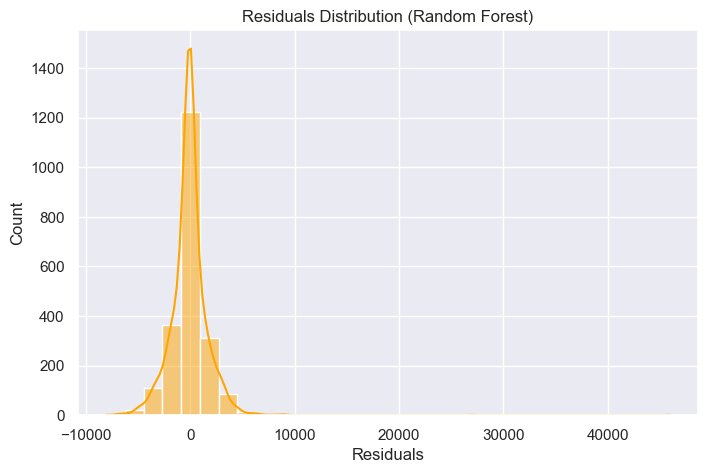

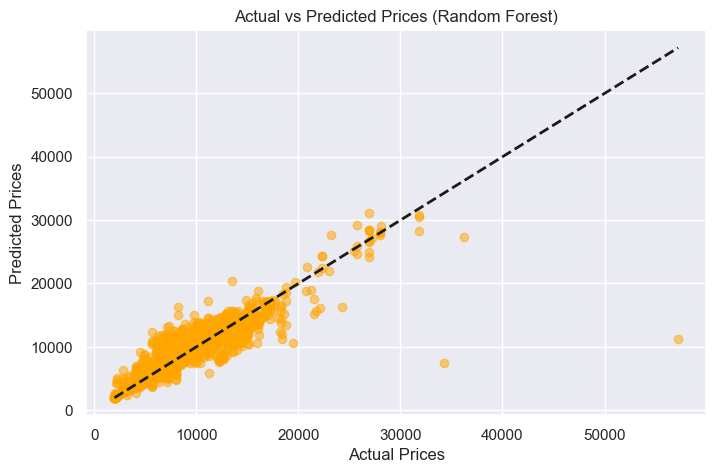

In [60]:
# Residual Plot
plt.figure(figsize=(8, 5))
sns.histplot(y_test - y_pred_rf, kde=True, bins=30, color="orange")
plt.title("Residuals Distribution (Random Forest)")
plt.xlabel("Residuals")
plt.show()

# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color="orange")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title("Actual vs Predicted Prices (Random Forest)")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()


<div style="text-align: center; color:rgb(16, 136, 18); font-size: 30px; font-weight: bold;">
  Comparison of 
  <span style="color:rgb(213, 114, 7); font-size: 30px; font-weight: bold;">Random Forest Regressor</span>
  with 
  <span style="color:rgb(213, 114, 7); font-size: 30px; font-weight: bold;">XGBoost</span>
</div>


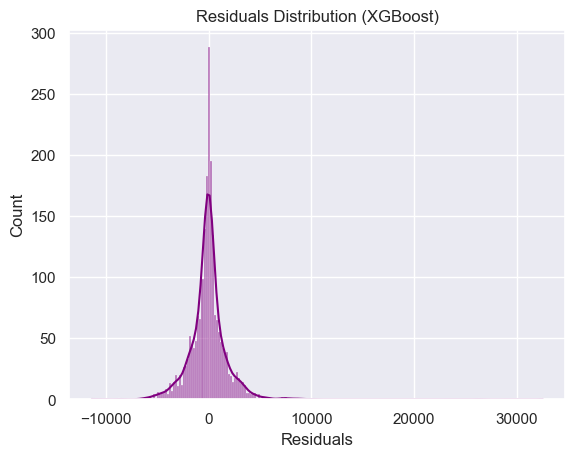

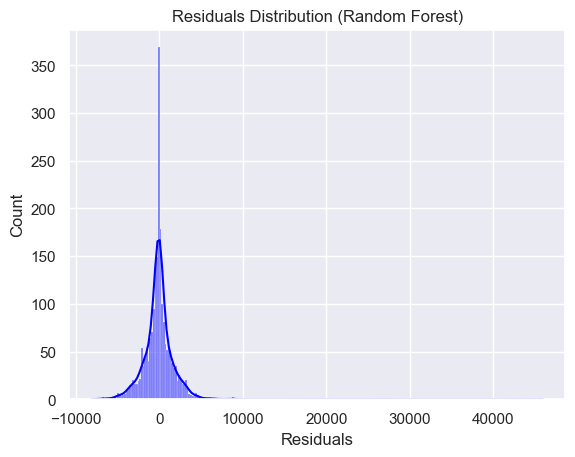

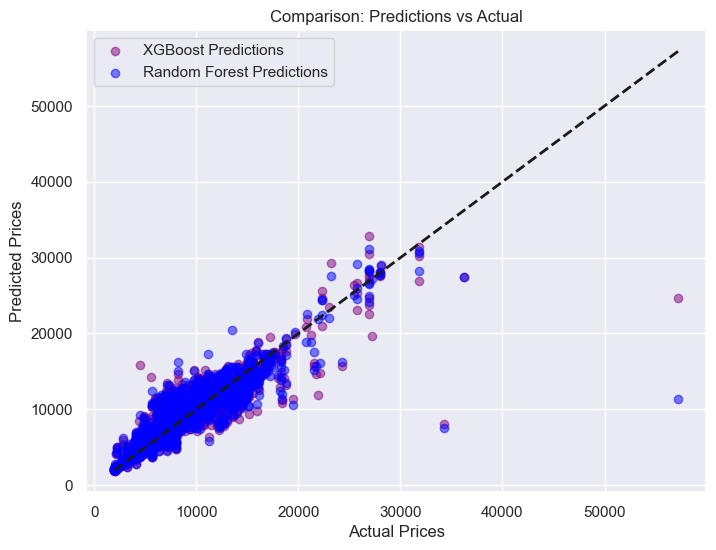

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Residuals for XGBoost
residuals_xgb = y_test - y_pred_xgb
sns.histplot(residuals_xgb, kde=True, color='purple')
plt.title("Residuals Distribution (XGBoost)")
plt.xlabel("Residuals")
plt.ylabel("Count")
plt.show()

# Plot Residuals for Random Forest
residuals_rf = y_test - y_pred_rf
sns.histplot(residuals_rf, kde=True, color='blue')
plt.title("Residuals Distribution (Random Forest)")
plt.xlabel("Residuals")
plt.ylabel("Count")
plt.show()

# Comparison of Predictions (XGBoost vs Random Forest)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, color="purple", label="XGBoost Predictions", alpha=0.5)
plt.scatter(y_test, y_pred_rf, color="blue", label="Random Forest Predictions", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title("Comparison: Predictions vs Actual")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.legend()
plt.show()

<h1 align="center" style="color:rgb(247, 187, 9); font-size: 50px; font-weight: bold;">
  Fitting model using 
  <span style="color:#119992; font-size:50px;font-weight: bold;">Random Forest Regressor</span>
</h1>

<ol style="font-size: 20px; font-weight: bold;">
  <li>
    <span style="color:#119992; font-size:20px; font-weight: bold;">
      Splitting dataset into train and test set in order to predict w.r.t <code>X_test</code>
    </span>
  </li>
  <li>
    <span style="color:#119992; font-size:20px; font-weight: bold;">Import model</span>
  </li>
  <li>
    <span style="color:#119992; font-size:20px; font-weight: bold;">Fit the data</span>
  </li>
  <li>
    <span style="color:#119992; font-size:20px; font-weight: bold;">
      Predict w.r.t <code>X_test</code>
    </span>
  </li>
  <li>
    <span style="color:#119992; font-size:20px; font-weight: bold;">
      In regression, check <strong>RSME</strong> Score
    </span>
  </li>
  <li>
    <span style="color:#119992; font-size:20px; font-weight: bold;">Plot graph</span>
  </li>
</ol>


In [62]:
from sklearn.model_selection import train_test_split
# Splits dataset into training and testing subsets.
# Uses 20% of data for testing (test_size=0.2).
# random_state=42 ensures reproducible results.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [63]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
#Training the Model:
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [64]:
#Making Predictions:
y_pred = reg_rf.predict(X_test)

In [65]:
# Score on Training Set
reg_rf.score(X_train, y_train)

0.9528961031919599

In [66]:
  # Score on Test Set
reg_rf.score(X_test, y_test)

0.7953869705435859

<span style="color:rgb(16, 136, 18); font-size: 30px; font-weight: bold;">
  Residuals Distribution<span style="color:rgb(213, 114, 7); font-size: 30px; font-weight: bold;">
</span></span>

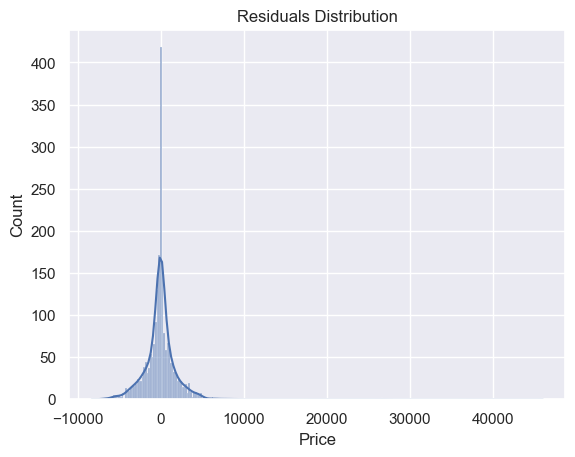

In [67]:

sns.histplot(y_test - y_pred, kde=True)  # Adding kde=True for the density curve
plt.title("Residuals Distribution")
plt.show()


<span style="color:rgb(16, 136, 18); font-size: 30px; font-weight: bold;">
  Scatter Plot<span style="color:rgb(213, 114, 7); font-size: 30px; font-weight: bold;">
</span></span>

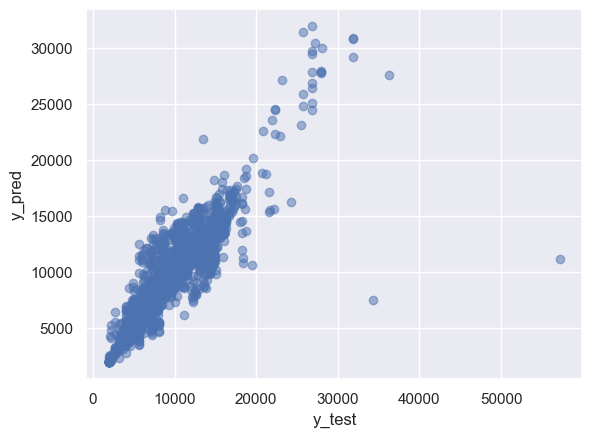

In [68]:

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

<div align="center" style="color:rgb(16, 136, 18); font-size: 50px; font-weight: bold;">
  Evaluating  the<span style="color:rgb(213, 114, 7); font-size: 50px; font-weight: bold;"> Model
</span></div>

In [69]:
from sklearn import metrics

In [70]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1186.7948444651072
MSE: 4411877.665796577
RMSE: 2100.447015707984



<span style="color:rgb(16, 136, 18); font-size: 30px; font-weight: bold;">
  Understanding <span style="color:rgb(213, 114, 7); font-size: 30px; font-weight: bold;">RMSE 
</span> and Its <span style="color:rgb(213, 114, 7); font-size: 30px; font-weight: bold;"> Normalization
</span></span>



- **RMSE**: Root Mean Squared Error, a measure of how far, on average, the predictions are from the actual values.

- **(max(DV)-min(DV))**: This represents the range of the target variable (DV stands for Dependent Variable). 
  - **max(y)**: The maximum observed value in the target data.
  - **min(y)**: The minimum observed value in the target data.
  
- **RMSE/(max(DV)-min(DV))**: By dividing the RMSE by the range of the target values, you’re essentially normalizing the error. This gives a relative measure of the error compared to the overall spread of the data. A smaller number after this division means the model’s errors are small relative to the total range of the data.


In [71]:
# RMSE/(max(DV)-min(DV))
2090.5509/(max(y)-min(y))

0.026887077025966846

In [72]:
#compares how close the predicted values (y_pred) are to the actual values
metrics.r2_score(y_test, y_pred)

0.7953869705435859

---

<h1 align="center" style="color:rgb(247, 187, 9); font-size: 50px; font-weight: bold;">
  Hyperparameter
  <span style="color:#119992; font-size:50px;font-weight: bold;">Tuning</span>
</h1>

<ul style="font-size: 20px; font-weight: bold;">
  <li>
    <span style="color:#119992; font-size:20px; font-weight: bold;">RandomizedSearchCV</span> --> Fast
  </li>
  <li>
    <span style="color:#119992; font-size:20px; font-weight: bold;">Assign hyperparameters</span> in the form of a dictionary
  </li>
  <li>
    <span style="color:#119992; font-size:20px; font-weight: bold;">Fit the model</span>
  </li>
  <li>
    <span style="color:#119992; font-size:20px; font-weight: bold;">Check best parameters and best score</span>
  </li>
</ul>


In [73]:
#import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

<h1 align="left" style="color:rgb(16, 136, 18); font-size: 40px; font-weight: bold;">
  Hyperparameters
</h1>

<ul style="font-size: 20px; font-weight: bold;">
  <li>
    <span style="color:#119992; font-size:20px; font-weight: bold;">n_estimators</span>:
    <ul style="font-size: 18px; font-weight: normal;">
      <li>Controls how many individual decision trees make up the Random Forest.</li>
      <li>More trees can improve accuracy but might be slower.</li>
      <li>We’re testing a range from 100 to 1200.</li>
    </ul>
  </li>

  <li>
    <span style="color:#119992; font-size:20px; font-weight: bold;">max_features</span>:
    <ul style="font-size: 18px; font-weight: normal;">
      <li>Determines how many features to consider when looking for the best split.</li>
      <li>Options:
        <ul>
          <li>'auto': Use all features.</li>
          <li>'sqrt': Use a number of features equal to the square root of total features.</li>
        </ul>
      </li>
    </ul>
  </li>

  <li>
    <span style="color:#119992; font-size:20px; font-weight: bold;">max_depth</span>:
    <ul style="font-size: 18px; font-weight: normal;">
      <li>Sets how deep each tree can grow.</li>
      <li>Ranges from 5 to 30.</li>
      <li>Deeper trees can model more complex patterns but risk overfitting.</li>
    </ul>
  </li>

  <li>
    <span style="color:#119992; font-size:20px; font-weight: bold;">min_samples_split</span>:
    <ul style="font-size: 18px; font-weight: normal;">
      <li>Minimum number of samples required to split a node into branches.</li>
      <li>Smaller values allow more splits (potentially overfitting), larger values keep trees simpler.</li>
    </ul>
  </li>

  <li>
    <span style="color:#119992; font-size:20px; font-weight: bold;">min_samples_leaf</span>:
    <ul style="font-size: 18px; font-weight: normal;">
      <li>Minimum number of samples that must be present in a leaf node.</li>
      <li>Larger values lead to more generalized leaves, reducing overfitting risk.</li>
    </ul>
  </li>
</ul>

<p style="font-size: 20px; font-weight: bold;">
  By specifying these ranges, we let RandomizedSearchCV explore various combinations, aiming to find a set of hyperparameters that provide the best model performance on unseen data.
</p>


In [74]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


<h1 align="left" style="color:rgb(16, 136, 18); font-size: 40px; font-weight: bold;">
Creating the Random Grid
</h1>

The `random_grid` dictionary specifies the hyperparameter ranges for RandomizedSearchCV, enabling efficient tuning of the Random Forest model.


In [75]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

<h1 align="left" style="color:rgb(16, 136, 18); font-size: 40px; font-weight: bold;">
  5-Fold Cross-Validation
</h1>

<ul style="font-size: 20px; font-weight: bold;">
  <li>
    <span style="color:#119992; font-size:20px; font-weight: bold;">Split the Data into 5 Parts:</span>
    <ul style="font-size: 18px; font-weight: normal;">
      <li>Divide the dataset into 5 equally sized groups, called "folds."</li>
    </ul>
  </li>

  <li>
    <span style="color:#119992; font-size:20px; font-weight: bold;">Train on 4 Folds, Test on 1 Fold:</span>
    <ul style="font-size: 18px; font-weight: normal;">
      <li>Pick one fold as the test set and combine the remaining 4 folds to form the training set.</li>
      <li>Train the model on these 4 folds and test it on the remaining 1 fold.</li>
    </ul>
  </li>

  <li>
    <span style="color:#119992; font-size:20px; font-weight: bold;">Repeat 5 Times:</span>
    <ul style="font-size: 18px; font-weight: normal;">
      <li>Repeat this process 5 times, each time choosing a different fold as the test set and the other 4 as the training set.</li>
    </ul>
  </li>

  <li>
    <span style="color:#119992; font-size:20px; font-weight: bold;">Average the Results:</span>
    <ul style="font-size: 18px; font-weight: normal;">
      <li>After 5 iterations, compute the average of the 5 performance scores for a more stable and reliable evaluation.</li>
    </ul>
  </li>

  <li>
    <span style="color:#119992; font-size:20px; font-weight: bold;">Reduces Overfitting:</span>
    <ul style="font-size: 18px; font-weight: normal;">
      <li>By testing on every part of the data exactly once, 5-Fold Cross-Validation reduces the risk of overfitting.</li>
      <li>This provides a better estimate of how the model might perform on unseen data.</li>
    </ul>
  </li>
</ul>


In [76]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

<h1 align="center" style="color:rgb(247, 187, 9); font-size: 50px; font-weight: bold;">
 Train the 
  <span style="color:#119992; font-size:50px;font-weight: bold;">Model</span>
</h1>

In [77]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

e:\ue\dss all\Machine Learning Final\Flight-Fare-App\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "e:\ue\dss all\Machine Learning Final\Flight-Fare-App\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\ue\dss all\Machine Learning Final\Flight-Fare-App\.venv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "e:\ue\dss all\Machine Learning Final\Flight-Fare-App\.venv\Lib\site-packages

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [78]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

<h1 align="center" style="color:rgb(247, 187, 9); font-size: 50px; font-weight: bold;">
  Evaluate
  <span style="color:#119992; font-size:50px;font-weight: bold;">The Model</span>
</h1>

In [79]:
prediction = rf_random.predict(X_test)

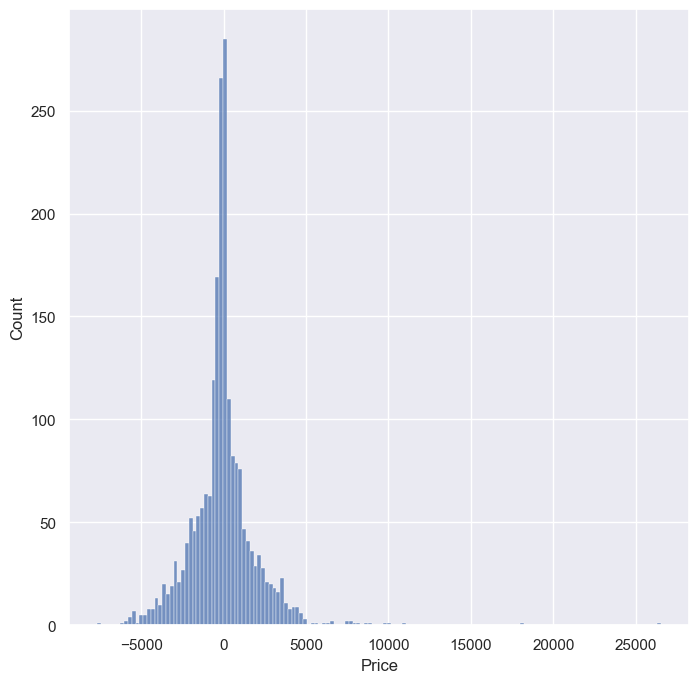

In [80]:
plt.figure(figsize = (8,8))
sns.histplot(y_test-prediction)
plt.show()

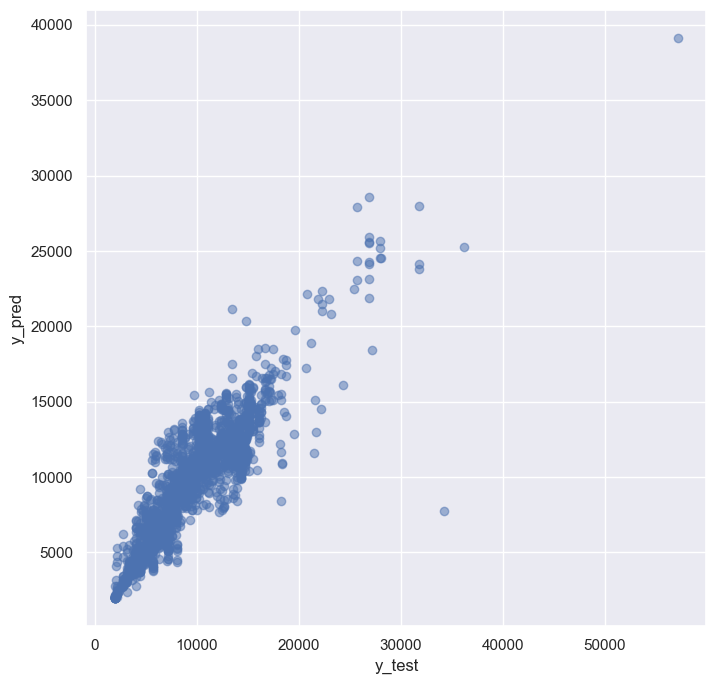

In [81]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [82]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1263.5498657551827
MSE: 3888678.8803795488
RMSE: 1971.973346772098


---

<h1 align="center" style="color:rgb(247, 187, 9); font-size: 50px; font-weight: bold;">
  Save the model to reuse it again
 
</h1>

In [83]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [84]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [85]:
y_prediction = forest.predict(X_test)

In [86]:
metrics.r2_score(y_test, y_prediction)

0.7953869705435859